In [ ]:
pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ----------- ---------------------------- 71.7/250.9 kB 2.0 MB/s eta 0:00:01
   -------------------------------- ------- 204.8/250.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.9 MB/s eta 0:00:00


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import datetime as dt

# Load Excel file into a DataFrame
file_path = '印度大基金.xlsx' 
df_port = pd.read_excel(file_path, sheet_name='price')
df_mkt = pd.read_excel(file_path, sheet_name='index')

In [ ]:
start = df_mkt.loc[1,'Date']
end = df_mkt.iloc[df_mkt.shape[0] -1  , 0]+ dt.timedelta(days=1)
inrusd = yf.download('INRUSD=X', start, end, auto_adjust= False).reset_index()
inrusd.columns = inrusd.columns.droplevel(0)
inrusd.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
inrusd.head()

[*********************100%***********************]  1 of 1 completed


,Date,Adj Close,Close,High,Low,Open,Volume
0,2024-03-18,0.012064,0.012064,0.012072,0.012059,0.012064,0
1,2024-03-19,0.012068,0.012068,0.012068,0.012042,0.012068,0
2,2024-03-20,0.012042,0.012042,0.012054,0.012016,0.012042,0
3,2024-03-21,0.012040,0.012040,0.012064,0.012016,0.012040,0
4,2024-03-22,0.012015,0.012015,0.012022,0.011945,0.012015,0


In [ ]:
#將印度股票價值轉緩為美元價值
merged_data = pd.concat([df_port,inrusd], axis=1)
merged_data['Adj Close'].iloc[49] = 1/84.56
value_data =  pd.concat([merged_data['Date'],merged_data['PORTFOLIO']*merged_data['Adj Close']],axis=1)
value_data.columns = ['Date', 'Portfolio_Value']

# 插入基金初始的美元投資價值$100000000
new_row = pd.DataFrame([100000000],['Open']).reset_index()
new_row.columns = ['Date','Portfolio_Value']
df = pd.concat([new_row, value_data], ignore_index=True)
df = df[['Date', 'Portfolio_Value']].dropna()
df

C:\Users\User\AppData\Local\Temp\ipykernel_37752\986981506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Adj Close'].iloc[49] = 1/84.56


,Date,Portfolio_Value
0,Open,1.000000e+08
1,2024-03-18 00:00:00,9.840862e+07
2,2024-03-19 00:00:00,9.720804e+07
3,2024-03-20 00:00:00,9.736192e+07
4,2024-03-21 00:00:00,9.847921e+07
5,2024-03-22 00:00:00,9.912493e+07
6,2024-03-25 00:00:00,9.868974e+07
7,2024-03-26 00:00:00,9.870287e+07
8,2024-03-27 00:00:00,9.973064e+07
9,2024-03-28 00:00:00,1.010541e+08


In [20]:
df_mktusd =  pd.concat([df_mkt['Date'],df_mkt['index'],merged_data['Adj Close'].shift(1)],axis=1)
df_mktusd.columns = ['Date', 'mkt value','inrusd']
df_mktusd.iloc[df_mktusd.shape[0]-1 , 2] = inrusd.iloc[inrusd.shape[0] - 1 , 5]
df_mktusd.loc[0,'inrusd']=inrusd.loc[0,'Open']
df_mktusd['mkt value usd'] = df_mktusd['mkt value']*df_mktusd['inrusd']
df_mktusd.dropna()

,Date,mkt value,inrusd,mkt value usd
0,open,72587.30,0.012064,875.717973
1,2024-03-18 00:00:00,72748.42,0.012064,877.661779
2,2024-03-19 00:00:00,72012.05,0.012068,869.043208
3,2024-03-20 00:00:00,72101.69,0.012042,868.251570
4,2024-03-21 00:00:00,72641.19,0.012040,874.619644
5,2024-03-22 00:00:00,72831.94,0.012015,875.104111
6,2024-03-25 00:00:00,72831.94,0.011963,871.262150
7,2024-03-26 00:00:00,72470.30,0.011988,868.767208
8,2024-03-27 00:00:00,72996.31,0.011998,875.827851
9,2024-03-28 00:00:00,73651.35,0.011995,883.480513


In [21]:
#定義投資組合之部位報酬
pret = (df['Portfolio_Value'] - df['Portfolio_Value'].shift(1))/df['Portfolio_Value'].shift(1)
#定義市場報酬
mretusd = (df_mktusd['mkt value usd'] - df_mktusd['mkt value usd'].shift(1))/df_mktusd['mkt value usd'].shift(1)
#定義無風險利率
mret = (df_mkt['index'] - df_mkt['index'].shift(1)) / df_mkt['index'].shift(1)
rf = 0.003*0.01

In [ ]:
#return dataframe
pret.dropna(inplace=True)
pret = pd.DataFrame(pret).reset_index(drop = True)
pret.columns=[['Portfolio return']]
mret.dropna(inplace =True)
mret = pd.DataFrame(mret).reset_index(drop = True)
mret.columns = [['Market return']]
mretusd.dropna(inplace = True)
mretusd = pd.DataFrame(mretusd).reset_index(drop =True)
mretusd.columns = [['Market return usd']]
return_table = pd.concat([mret,pret,mretusd],axis = 1)
return_table = return_table[(return_table[['Market return']] != 0).all(axis=1)]
return_table.dropna(inplace = True)
return_table = return_table.reset_index(drop = True)
return_table

,Market return,Portfolio return,Market return usd
0,0.002220,-0.015914,0.002220
1,-0.010122,-0.012200,-0.009820
2,0.001245,0.001583,-0.000911
3,0.007482,0.011476,0.007334
4,0.002626,0.006557,0.000554
5,-0.004965,0.000133,-0.002864
6,0.007258,0.010413,0.008127
7,0.008974,0.013270,0.008738
8,0.004931,0.007551,0.005271
9,-0.001495,0.006485,-0.002032


In [23]:
import statsmodels.api as sm
# Regression
Mret = sm.add_constant(return_table['Market return usd']-rf)
model = sm.OLS(return_table['Portfolio return']-rf, Mret)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Portfolio return   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     74.58
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           6.07e-11
Time:                        13:35:13   Log-Likelihood:                 173.81
No. Observations:                  45   AIC:                            -343.6
Df Residuals:                      43   BIC:                            -340.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
results.params[0]/results.resid.std()

0.2839297838392929

In [27]:
# 获取模型的系数（包括截距和斜率）
coefficients = results.params

# 提取斜率系数
beta = coefficients[1]  # 注意：数组索引从0开始，所以斜率系数的索引是1
alpha = float(return_table['Portfolio return'].mean())-(rf + beta * return_table['Market return usd'].mean())
print('alpha=',float(alpha))
print('beta=',float(beta))




alpha= 0.001432094245870364
beta= 0.9406215964913289


C:\Users\User\AppData\Local\Temp\ipykernel_37752\982578821.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  alpha = float(return_table['Portfolio return'].mean())-(rf + beta * return_table['Market return usd'].mean())
C:\Users\User\AppData\Local\Temp\ipykernel_37752\982578821.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('alpha=',float(alpha))


In [28]:
portfolio_std=return_table['Portfolio return'].std()
market_std=return_table['Market return usd'].std()
pr_sharpe=float((return_table['Portfolio return'].mean()-rf)/portfolio_std)
pr_treynor=float((return_table['Portfolio return'].mean()-rf)/beta)
mr_sharpe=float((return_table['Market return usd'].mean()-rf)/market_std)
mr_treynor=float((return_table['Market return usd'].mean()-rf)/1)
information_ratio=(results.params[0]/results.resid.std())
m_square=(((float(return_table['Portfolio return'].mean()-rf)*float(market_std)/float(portfolio_std)+rf)-float(return_table['Market return usd'].mean())))
print ('pr sharpe ratio=',float(pr_sharpe))
print('pr treynor ratio=',float(pr_treynor))
print('mr sharpe ratio=',float(mr_sharpe))
print('mr treynor ratio=',float(mr_treynor))
print('information ratio=',information_ratio)
print('m_square=',m_square)
print('idiosyncratic reisk=',results.resid.std())



pr sharpe ratio= 0.23927180415881322
pr treynor ratio= 0.002163447740897999
mr sharpe ratio= 0.08484084162123885
mr treynor ratio= 0.000610950010447935
information ratio= 0.2839297838381484
m_square= 0.001112077584013458
idiosyncratic reisk= 0.005143218418387351


C:\Users\User\AppData\Local\Temp\ipykernel_37752\655532309.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pr_sharpe=float((return_table['Portfolio return'].mean()-rf)/portfolio_std)
C:\Users\User\AppData\Local\Temp\ipykernel_37752\655532309.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pr_treynor=float((return_table['Portfolio return'].mean()-rf)/beta)
C:\Users\User\AppData\Local\Temp\ipykernel_37752\655532309.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mr_sharpe=float((return_table['Market return usd'].mean()-rf)/market_std)
C:\Users\User\AppData\Local\Temp\ipykernel_37752\655532309.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a 

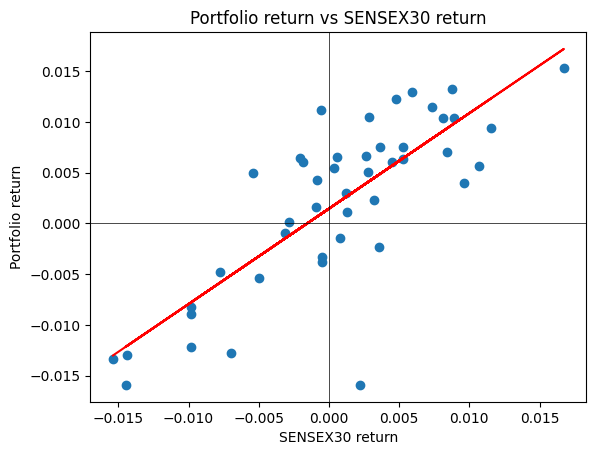

In [29]:
import matplotlib.pyplot as plt

# 绘制散点图
plt.scatter(return_table['Market return usd'], return_table['Portfolio return'])
plt.title('Portfolio return vs SENSEX30 return')
plt.xlabel('SENSEX30 return')
plt.ylabel('Portfolio return')
pret_pred = results.params[0] + results.params[1]*return_table['Market return usd']
plt.plot(return_table['Market return usd'], pret_pred, color='red', label='Least Squares Regression Line')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
# 显示图形
plt.show()

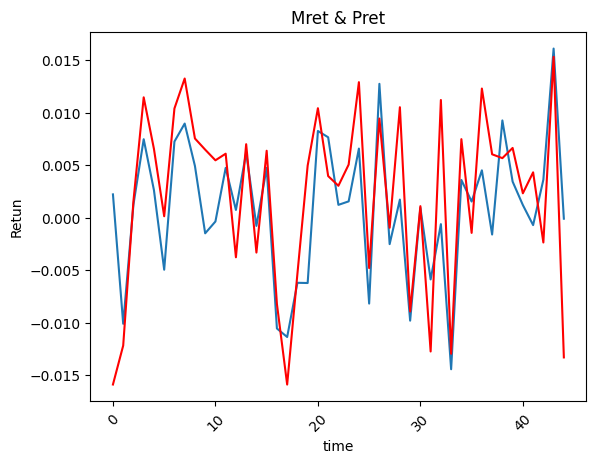

In [30]:
plt.plot(return_table.index, return_table['Market return'], label = 'Mret')
plt.plot(return_table.index, return_table['Portfolio return'],label = 'Pret', color = 'red')

# 加上標籤等
plt.title('Mret & Pret')
plt.xlabel('time')
plt.ylabel('Retun')
plt.xticks(rotation=45)  # 讓 x 軸標籤旋轉 45 度，避免重疊

# 顯示圖形
plt.show()

# 成長與價值投資組合

In [35]:
growth = ['NYKAA','POLICYBZR','ZOMATO','FACT','ADANIGREEN','VOLTAS','ATGL','DIXON','LAURUSLABS','JIOFIN','NAUKRI','ABB','ADANIENT','DMART','TRENT','SIEMENS','BHARTIARTL','ADANIENSOL','APOLLOHOSP','GODREJPROP','ASTRAL','TATACHEM','ZEEL','ICICIPRULI','MFSL','HAVELLS','VBL','TATACONSUM','SUZLON','PIDILITIND']#,'TITAN','LODHA','IRCTC','DIVISLAB','HDFCLIFE','JUBLFOOD','SBILIFE','DLF','NESTLEIND','BHARATFORG','MAXHEALTH','SONACOMS','KPITTECH','PAGEIND','KALYANKJIL','CGPOWER','CUMMINSIND','PATANJALI','SJVN','MCDOWELL-N']
value = ['HINDPETRO','BPCL','IOC','CANBK','ONGC','BANKBARODA','LICHSGFIN','TATAMTRDVR','PFC','UNIONBANK','BANKINDIA','INDIANB','COALINDIA','FEDERALBNK','RECLTD','SBIN','OIL','TATAMOTORS','MAHABANK','NMDC','BAJAJHLDNG','INDUSINDBK','PETRONET','ADANIPOWER','BANDHANBNK','AXISBANK','GAIL','SUNTV','PNB']#,'INDUSTOWER','HINDALCO','IGL','LICI']
newgrowth = list(map(lambda s: s + '.NS', growth))
newvalue = list(map(lambda s: s + '.NS', value))
g = pd.DataFrame()
v = pd.DataFrame()
gret = yf.download(newgrowth, start=dt.datetime(2024,3,15), end=dt.datetime(2024,5,26))['Close'].pct_change()
vret = yf.download(newvalue, start=dt.datetime(2024,3,15), end=dt.datetime(2024,5,26))['Close'].pct_change()
g_port_ret = gret.mean(axis=1).to_frame(name = 'Growth portfolio return').dropna().reset_index(drop = True)
v_port_ret = vret.mean(axis=1).to_frame(name = 'Value portfolio return').dropna().reset_index(drop = True)

[*********************100%***********************]  30 of 30 completed
[*********************100%***********************]  29 of 29 completed


In [36]:
d = return_table['Portfolio return'].drop(return_table['Portfolio return'].index[-5]).reset_index(drop = True)
Gret = sm.add_constant(g_port_ret['Growth portfolio return'])
gmodel = sm.OLS(d, Gret)
gresults = gmodel.fit()
print(gresults.summary())

                            OLS Regression Results                            
Dep. Variable:       Portfolio return   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     35.08
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           5.13e-07
Time:                        13:41:57   Log-Likelihood:                 160.68
No. Observations:                  44   AIC:                            -317.4
Df Residuals:                      42   BIC:                            -313.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [37]:
Vret = sm.add_constant(v_port_ret['Value portfolio return']).dropna()
vmodel = sm.OLS(d, Vret)
vresults = vmodel.fit()
print(vresults.summary())

                            OLS Regression Results                            
Dep. Variable:       Portfolio return   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     25.70
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           8.50e-06
Time:                        13:42:04   Log-Likelihood:                 157.82
No. Observations:                  44   AIC:                            -311.6
Df Residuals:                      42   BIC:                            -308.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

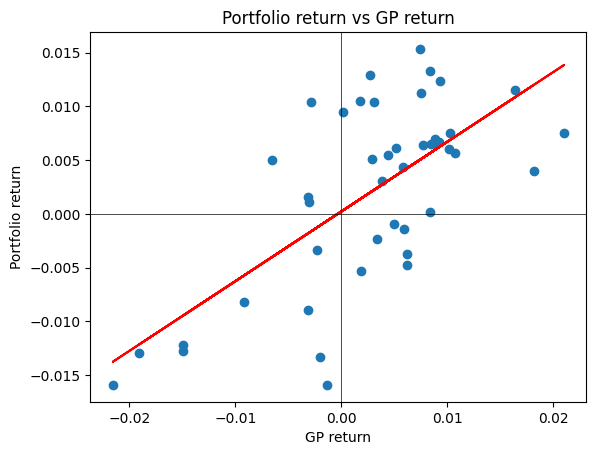

In [38]:
plt.scatter(g_port_ret['Growth portfolio return'],d )
plt.title('Portfolio return vs GP return')
plt.xlabel('GP return')
plt.ylabel('Portfolio return')
pret_pred2 = gresults.params[0] + gresults.params[1]*g_port_ret['Growth portfolio return']
plt.plot(g_port_ret['Growth portfolio return'], pret_pred2, color='red', label='Least Squares Regression Line')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
# 显示图形
plt.show()

In [39]:
e = return_table['Market return'].drop(return_table['Market return'].index[-5]).reset_index(drop = True)
mm = sm.add_constant(e).dropna()
ggmodel = sm.OLS(g_port_ret['Growth portfolio return'], mm)
ggresults = ggmodel.fit()
print(ggresults.summary())
print('information ratio of Growth benchmark = ',ggmodel.fit().params[0]/np.std(ggmodel.fit().resid, ddof=1))


                               OLS Regression Results                              
Dep. Variable:     Growth portfolio return   R-squared:                       0.405
Model:                                 OLS   Adj. R-squared:                  0.391
Method:                      Least Squares   F-statistic:                     28.61
Date:                     Thu, 27 Feb 2025   Prob (F-statistic):           3.41e-06
Time:                             13:42:13   Log-Likelihood:                 157.01
No. Observations:                       44   AIC:                            -310.0
Df Residuals:                           42   BIC:                            -306.4
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [40]:
mm = sm.add_constant(e).dropna()
vvmodel = sm.OLS(v_port_ret['Value portfolio return'], mm)
vvresults = vvmodel.fit()
print(vvresults.summary())
print('information ratio of Value benchmark = ',vvmodel.fit().params[0]/np.std(vvmodel.fit().resid, ddof=1))

                              OLS Regression Results                              
Dep. Variable:     Value portfolio return   R-squared:                       0.258
Model:                                OLS   Adj. R-squared:                  0.240
Method:                     Least Squares   F-statistic:                     14.57
Date:                    Thu, 27 Feb 2025   Prob (F-statistic):           0.000437
Time:                            13:42:29   Log-Likelihood:                 139.23
No. Observations:                      44   AIC:                            -274.5
Df Residuals:                          42   BIC:                            -270.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [41]:
print('meg =', np.mean(g_port_ret['Growth portfolio return']).round(10),'stdg =',np.std(g_port_ret['Growth portfolio return']).round(10),'Sharpg =',(np.mean(g_port_ret['Growth portfolio return'])-rf)/np.std(g_port_ret['Growth portfolio return']),'Treynerg =',(np.mean(g_port_ret['Growth portfolio return'])-rf)/ggresults.params[1])
print('meg =', np.mean(v_port_ret['Value portfolio return']).round(10),'stdv =',np.std(v_port_ret['Value portfolio return']).round(10),'Sharpv =',(np.mean(v_port_ret['Value portfolio return'])-rf)/np.std(v_port_ret['Value portfolio return']),'Treynerv =',(np.mean(v_port_ret['Value portfolio return'])-rf)/vvresults.params[1])

meg = 0.0028524816 stdg = 0.0088481943 Sharpg = 0.3189895563430596 Treynerg = 0.0032864731410361804
meg = 0.0027507508 stdv = 0.0118637913 Sharpv = 0.22933231926567293 Treynerv = 0.002963051884040663
